In [115]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [116]:
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_theme(style="white", palette=None)

<AxesSubplot:xlabel='time'>

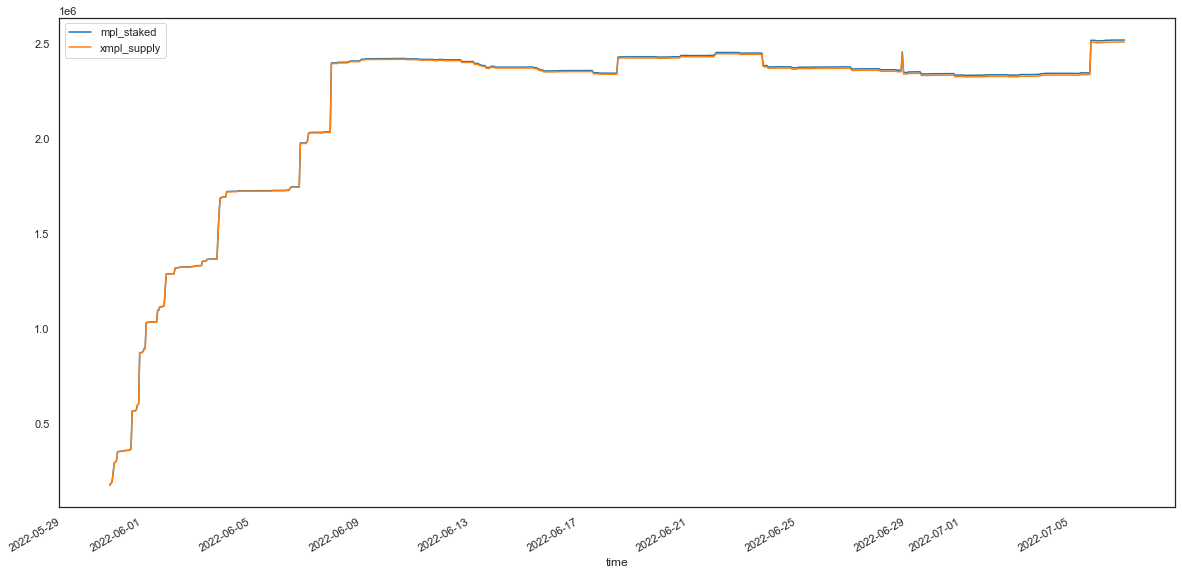

In [150]:
df = pd.read_csv('data/total_mpl_staked.csv')
df.index = pd.to_datetime(df['time'], unit='s')
df = df.loc[df.index > pd.to_datetime(1653933769, unit='s')]
df[['mpl_staked', 'xmpl_supply']].plot()


time
2022-05-30 20:49:55    0.999835
2022-05-30 19:48:09    0.999860
2022-05-30 18:54:30    0.999883
2022-05-30 22:48:16    0.999795
2022-05-31 00:49:21    0.999764
                         ...   
2022-07-06 21:47:26    0.995861
2022-07-06 23:38:37    0.995854
2022-07-06 18:16:15    0.995873
2022-07-06 22:43:08    0.995857
2022-07-06 09:08:18    0.995907
Length: 879, dtype: float64

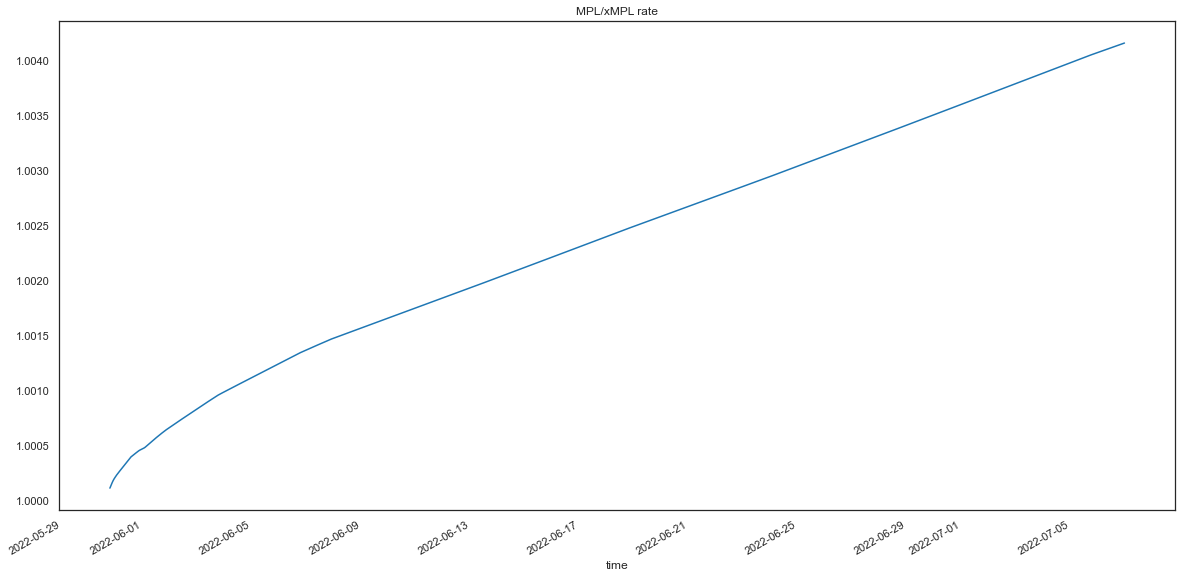

In [151]:
df['rate'].plot(title="MPL/xMPL rate")

df['xmpl_supply'] / df['mpl_staked']

<AxesSubplot:title={'center':'MPL revenue APR'}, xlabel='Date', ylabel='APR'>

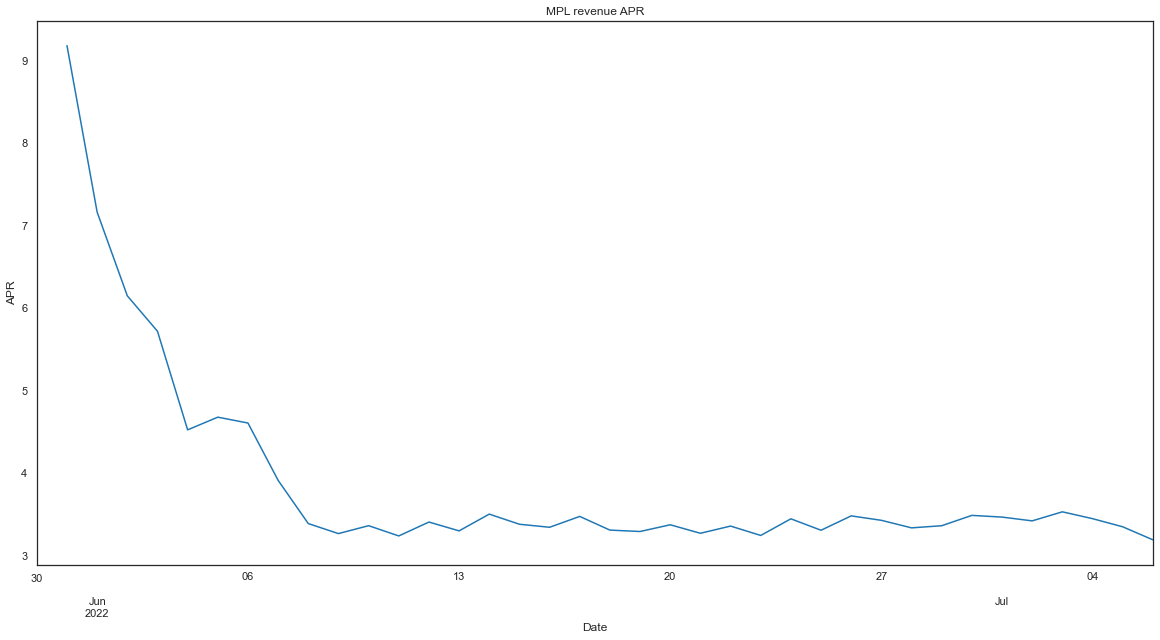

In [152]:

df['slope'] = pd.Series(np.gradient(df['rate']), df.index)


df_counts = df['rate'].resample('D').max()

daily_apr = df_counts.pct_change() * 365 * 100

daily_apr.plot(xlabel="Date", ylabel="APR", title="MPL revenue APR")

In [153]:
seconds_in_year = 31536000
multiplier = seconds_in_year / (df.iloc[-1]['time']-df.iloc[0]['time'])
multiplier

9.996503632830095

In [154]:
current_apr_mpl = (df.iloc[-1]['rate']-df.iloc[0]['rate'])*100 * multiplier
current_apr_mpl

3.943804618818307

<AxesSubplot:xlabel='time'>

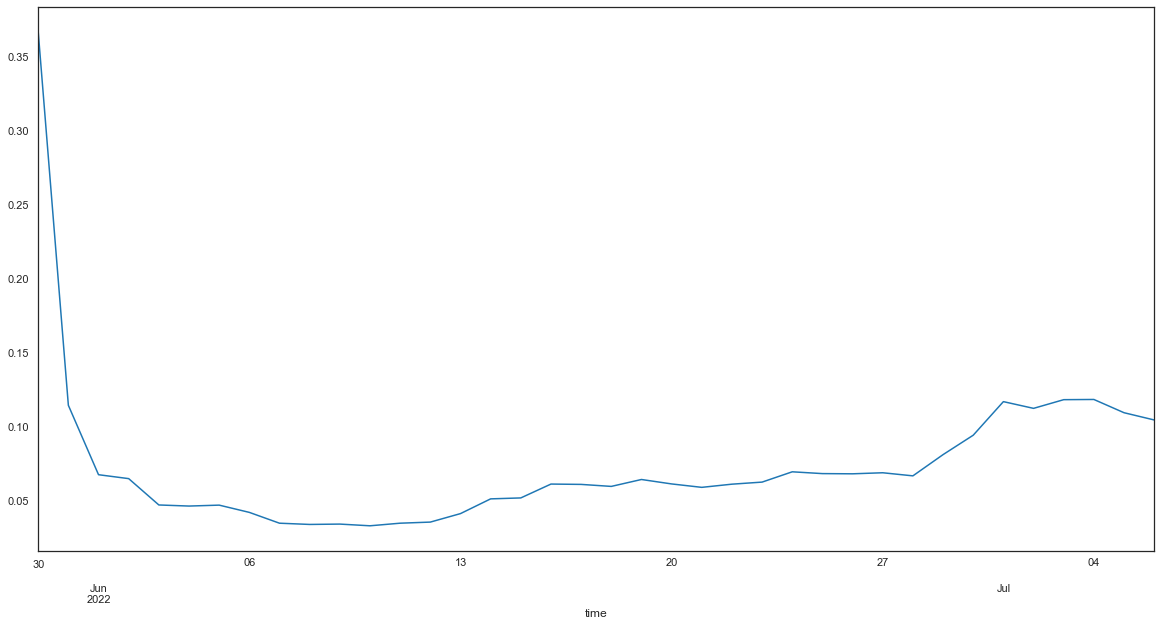

In [178]:
prices = pd.read_csv('data/mpl-usd-price.csv')
prices.index = pd.to_datetime(prices['snapped_at'])
prices.index.tz_convert(None)
prices = prices.drop('snapped_at', axis=1)

yearly_earnings = 2360000
# prices.index

df_daily = df.resample('D').max()
df_daily.index = df_daily.index.tz_localize(tz="UTC")

prices_daily = prices.resample('D').max()


final = df_daily.join(prices_daily)

(yearly_earnings / (final['mpl_staked'] * final['price'])).plot()

In [177]:
final

,rate,time,block,mpl_staked,xmpl_supply,slope,price,market_cap,total_volume
time,,,,,,,,,
2022-05-30 00:00:00+00:00,1.000221,1653954585,14875492,2.973761e+05,2.973105e+05,0.000059,21.648782,1.191748e+08,1.129809e+06
2022-05-31 00:00:00+00:00,1.000472,1654038380,14881444,8.738075e+05,8.733950e+05,0.000050,23.572402,1.448143e+08,2.016124e+06
2022-06-01 00:00:00+00:00,1.000669,1654125948,14887644,1.288402e+06,1.287541e+06,0.000151,27.026723,1.666929e+08,4.538296e+06
2022-06-02 00:00:00+00:00,1.000837,1654212890,14893844,1.330922e+06,1.329809e+06,0.000082,27.223328,1.683391e+08,2.923764e+06
2022-06-03 00:00:00+00:00,1.000994,1654300082,14900044,1.693416e+06,1.691734e+06,0.000121,29.419070,1.823415e+08,2.448643e+06
2022-06-04 00:00:00+00:00,1.001118,1654383679,14905748,1.726035e+06,1.724194e+06,0.000124,29.317747,1.818413e+08,3.197620e+06
2022-06-05 00:00:00+00:00,1.001246,1654470326,14911700,1.727464e+06,1.725314e+06,0.000019,28.906353,1.794300e+08,1.265316e+06
2022-06-06 00:00:00+00:00,1.001372,1654558636,14917652,1.977550e+06,1.974839e+06,0.000014,28.165956,1.748954e+08,1.230808e+06
2022-06-07 00:00:00+00:00,1.001480,1654645314,14923604,2.399028e+06,2.395483e+06,0.000009,28.047372,1.713458e+08,1.429937e+06
